In [115]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

## Load model

In [116]:
device = "cuda"

### Old model

In [117]:
sam_checkpoint = "../runs/241028_SAM_FT_water_10e/241028_SAM_FT_10e_.pth"
model_type = "vit_b"

sam1 = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam1.to(device=device)

predictor1 = SamPredictor(sam1)

### New model

In [118]:
sam_checkpoint = "../runs/241114_SAM_ViT_b_PROMPT_POINT_ft_v2/best.pth"
model_type = "vit_b"

sam2 = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam2.to(device=device)

predictor2 = SamPredictor(sam2)

In [119]:
def run_seg(predictor, image):
    predictor.set_image(image)

    masks, scores, logits = predictor.predict(
        point_coords=None,
        point_labels=None,
        multimask_output=False,
    )

    binary_mask = (masks[0, :, :] > 0.0).astype(np.float32)

    seg_img = img.copy()
    seg_img[binary_mask==1] = (0,0,255)
    transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)
    return transparent_img

## Image

In [120]:
img_dir = r"D:\015_segmentation\datasets\AY_frames"
#img_dir = r"D:\000_Datasets\20.Water segmentation\DANU_WS_v1\test\images"
img_list = [os.path.join(img_dir,f) for f in os.listdir(img_dir) if f.endswith(".jpg")]

D:\015_segmentation\datasets\AY_frames\AY1680.jpg


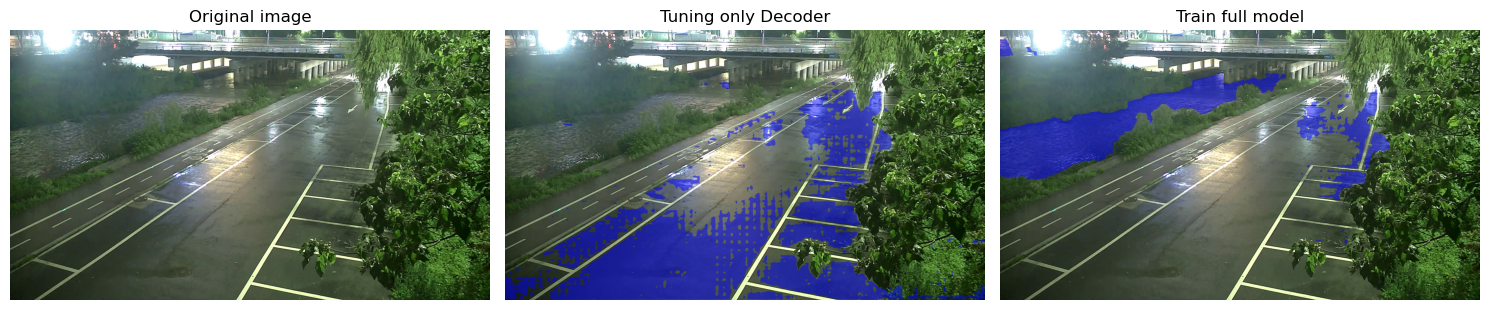

In [163]:
idx = -17 #9
img_path = img_list[idx]
print(img_path)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.axis('off')
plt.tight_layout()
plt.imshow(img)
plt.title("Original image")


plt.subplot(1,3,2)
result_old = run_seg(predictor1, img)
plt.axis('off')
plt.tight_layout()
plt.imshow(result_old)
plt.title("Tuning only Decoder")

plt.subplot(1,3,3)
result_new = run_seg(predictor2, img)
plt.axis('off')
plt.tight_layout()
plt.imshow(result_new)
plt.title("Train full model");